In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import numpy as np
import time
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
train_images.shape

(50000, 32, 32, 3)

In [7]:
 test_images.shape

(10000, 32, 32, 3)

In [8]:
def plot_image(image):
    plt.imshow(image, cmap = 'gray', interpolation="nearest")
    plt.axis("off")

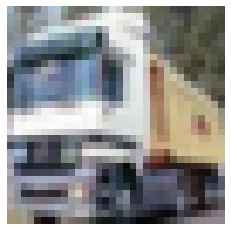

In [9]:
plot_image(train_images[1])

In [10]:
train_images.shape

(50000, 32, 32, 3)

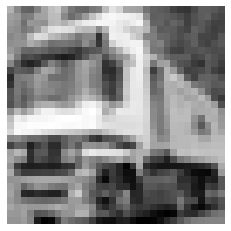

In [11]:
plot_image(train_images[1,:,:,1])

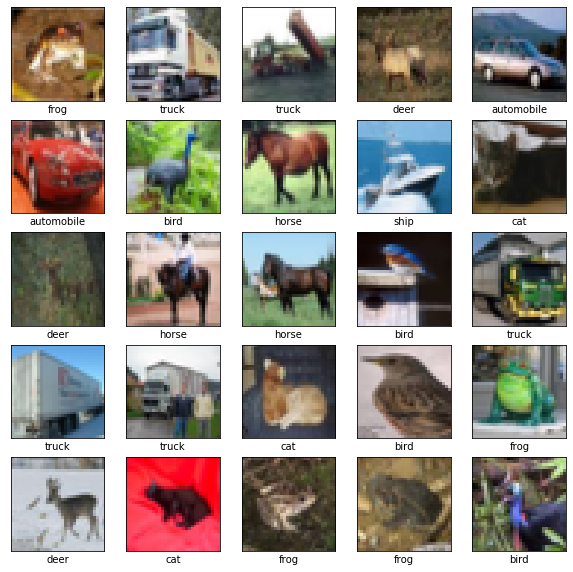

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [13]:
train_images.shape

(50000, 32, 32, 3)

In [14]:
train_images_gray = train_images.mean(axis=3)
test_images_gray = test_images.mean(axis=3)

In [15]:
train_images_gray.shape

(50000, 32, 32)

In [16]:
test_images_gray.shape

(10000, 32, 32)

In [17]:
train_images = train_images_gray.reshape((50000, 32, 32, 1))
test_images = test_images_gray.reshape((10000, 32, 32, 1))

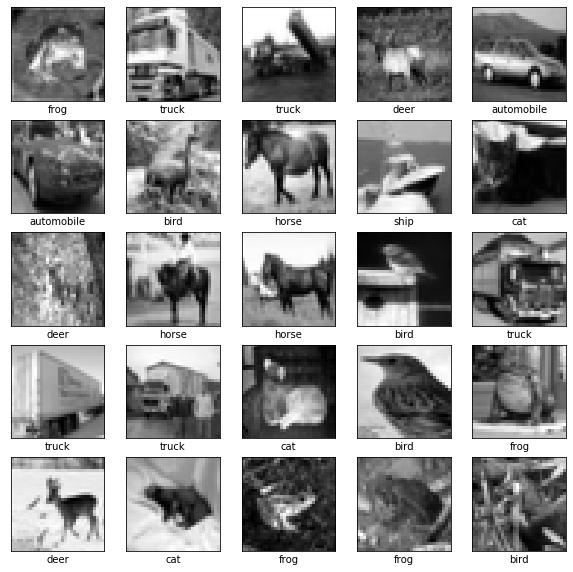

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_gray[i],cmap = 'gray')
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [25]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [26]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [27]:
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [28]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model1.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 30s 607us/sample - loss: 1.6560 - acc: 0.4036 - val_loss: 1.3633 - val_acc: 0.5192
Epoch 2/10
50000/50000 [==============================] - 31s 620us/sample - loss: 1.2686 - acc: 0.5578 - val_loss: 1.1557 - val_acc: 0.6003
Epoch 3/10
50000/50000 [==============================] - 31s 621us/sample - loss: 1.1073 - acc: 0.6135 - val_loss: 1.0867 - val_acc: 0.6204
Epoch 4/10
50000/50000 [==============================] - 30s 605us/sample - loss: 1.0042 - acc: 0.6527 - val_loss: 0.9909 - val_acc: 0.6550
Epoch 5/10
50000/50000 [==============================] - 29s 589us/sample - loss: 0.9271 - acc: 0.6784 - val_loss: 0.9752 - val_acc: 0.6623
Epoch 6/10
50000/50000 [==============================] - 30s 600us/sample - loss: 0.8699 - acc: 0.7002 - val_loss: 0.9341 - val_acc: 0.6806
Epoch 7/10
50000/50000 [==============================] - 34s 675us/sample - loss: 0.8201 - acc: 0.7165 

In [33]:
test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 2s - loss: 0.9604 - acc: 0.6751


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


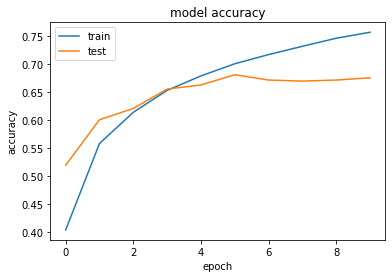

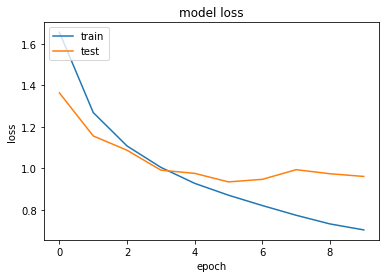

In [31]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [37]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model2.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 34s 671us/sample - loss: 0.9773 - acc: 0.6605 - val_loss: 0.9605 - val_acc: 0.6687
Epoch 2/20
50000/50000 [==============================] - 32s 630us/sample - loss: 0.9474 - acc: 0.6730 - val_loss: 0.9602 - val_acc: 0.6676
Epoch 3/20
50000/50000 [==============================] - 33s 654us/sample - loss: 0.9249 - acc: 0.6774 - val_loss: 0.9249 - val_acc: 0.6855
Epoch 4/20
50000/50000 [==============================] - 35s 700us/sample - loss: 0.9053 - acc: 0.6822 - val_loss: 0.9477 - val_acc: 0.6746
Epoch 5/20
50000/50000 [==============================] - 32s 635us/sample - loss: 0.8890 - acc: 0.6901 - val_loss: 0.9824 - val_acc: 0.6656
Epoch 6/20
50000/50000 [==============================] - 31s 611us/sample - loss: 0.8799 - acc: 0.6918 - val_loss: 0.9844 - val_acc: 0.6732
Epoch 7/20
50000/50000 [==============================] - 31s 614us/sample - loss: 0.8578 - acc: 0.7007 

In [40]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 2s - loss: 0.9380 - acc: 0.7067


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


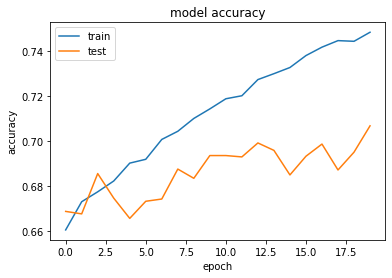

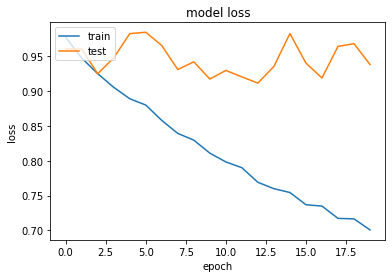

In [38]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
from functools import partial

DefaultConv2D = partial(layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

In [19]:
model = models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 1]),
    layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    layers.Dense(units=64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=10, activation='softmax'),
])

W0618 16:28:32.607934 139974607521600 deprecation.py:506] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         5

In [ ]:
model.fit(train_images, train_labels, epochs=10, batch_size=1000, shuffle=True, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 301s 7ms/sample - loss: 2.2251 - acc: 0.1506 - val_loss: 2.0855 - val_acc: 0.2466
Epoch 2/10
45000/45000 [==============================] - 310s 7ms/sample - loss: 2.0478 - acc: 0.2302 - val_loss: 1.8430 - val_acc: 0.3306
Epoch 3/10
45000/45000 [==============================] - 365s 8ms/sample - loss: 1.8788 - acc: 0.2998 - val_loss: 1.6846 - val_acc: 0.3904
Epoch 4/10
39000/45000 [=========================>....] - ETA: 45s - loss: 1.7776 - acc: 0.3412